## SMS Spam Classifier: Bernoulli Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Bernoulli Naive Bayes

In [1]:
import pandas as pd
docs = pd.read_table('SMSSpamCollection', header=None, names=['Class', 'sms'])
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
#df.column_name.value_counts() - gives no. of unique inputs in that columns
docs.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [3]:
ham_spam=docs.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [4]:
print("Spam % is ",(ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

Spam % is  13.406317300789663


In [5]:
# mapping labels to 1 and 0
docs['label'] = docs.Class.map({'ham':0, 'spam':1})

In [6]:
docs.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
X=docs.sms
y=docs.label

In [8]:
X = docs.sms
y = docs.label
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [9]:
# splitting into test and train

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorising the text
vect = CountVectorizer(stop_words='english')

In [12]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [13]:
vect.vocabulary_

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6673,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6665,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6614,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6852,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7127,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6876,
 'wiskey': 7012,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [14]:
vect.get_feature_names_out()

array(['00', '000', '008704050406', ..., 'zyada', 'èn', '〨ud'],
      dtype=object)

In [15]:
# transform
X_train_transformed = vect.transform(X_train)
X_test_tranformed =vect.transform(X_test)

In [16]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_tranformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.9770279971284996

In [17]:
bnb

BernoulliNB()

In [18]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1207,    1],
       [  31,  154]])

In [19]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1207    1]
 [  31  154]]


In [20]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8324324324324325


In [21]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.9991721854304636


In [22]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9935483870967742
0.9935483870967742


In [23]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9935483870967742
PRECISION SCORE : 0.9935483870967742
RECALL SCORE : 0.8324324324324325
F1 SCORE : 0.9058823529411765


In [24]:

y_pred_proba

array([[1.00000000e+00, 1.54647985e-10],
       [1.00000000e+00, 1.69177313e-10],
       [9.99999997e-01, 2.52488636e-09],
       ...,
       [9.99994219e-01, 5.78141360e-06],
       [3.64570741e-06, 9.99996354e-01],
       [1.00000000e+00, 2.90374743e-12]])

In [25]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [26]:
print (roc_auc)

0.9967692858421334


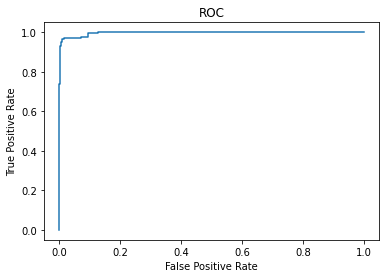

In [27]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)